# Breast Cancer Wisconsin (Diagnostic)

## Introduction

Breast cancer remains a significant global health concern, affecting millions of individuals worldwide. Early and accurate diagnosis plays a pivotal role in enhancing treatment outcomes and overall survival rates. In the realm of medical advancements, machine learning has emerged as a powerful tool for improving diagnostic processes and aiding healthcare professionals in decision-making. The Breast Cancer Wisconsin (Diagnostic) dataset serves as a valuable resource for researchers and data scientists seeking to develop predictive models for the classification of breast tumors as malignant or benign.

This assignment delves into the exploration and application of machine learning techniques to analyze the Breast Cancer Wisconsin (Diagnostic) dataset. The dataset includes features extracted from digital images of fine needle aspirate (FNA) biopsies, providing a comprehensive set of information for each instance. Through the utilization of machine learning algorithms, we aim to build predictive models capable of discerning between malignant and benign tumors, ultimately contributing to more accurate and timely breast cancer diagnoses.

The significance of this assignment lies in its potential to contribute to the ongoing efforts to enhance the efficiency of breast cancer diagnosis. By leveraging machine learning methodologies, we seek to uncover patterns and relationships within the dataset that may be imperceptible to human observers. As we navigate this exploration, we will employ various classification algorithms, evaluate their performance, and strive to develop models that can generalize well to new, unseen data.

![Image Alt Text](https://as1.ftcdn.net/v2/jpg/05/92/35/30/1000_F_592353033_tYN8WG03lBs3SPsrcFQOPuyXqCpdwANQ.jpg)

In [86]:
# Install required packages
!pip install numpy
!pip install pandas
!pip install tensorflow
!pip install optuna

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


Defaulting to user installation because normal site-packages is not writeable


In [87]:
# Import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from sklearn import metrics
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

from sklearn.metrics import classification_report
import optuna
from optuna.samplers import TPESampler
import pickle

In [88]:
# Read in datasets
train_df = pd.read_csv('data.csv')

# Data Exploration

## Basic Analysis

Look at the first few rows, data types, summary statistics, and shape of the dataset.

#### Column Information:
    - diagnosis: The target variable, indicating whether the tumor is malignant (M) or benign (B).
    - radius_mean: Mean of distances from the center to points on the perimeter.
    - texture_mean: Standard deviation of gray-scale values.
    - perimeter_mean: Mean perimeter of the cell nuclei.
    - area_mean: Mean area of the cell nuclei.
    - smoothness_mean: Local variation in radius lengths.
    - compactness_mean: Compactness (perimeter^2 / area - 1.0).
    - concavity_mean: Severity of concave portions of the contour.
    - concave points_mean: Number of concave portions of the contour.
    - symmetry_mean: Symmetry of the cell nuclei.
    - fractal_dimension_mean: Fractal dimension of the cell nuclei.
    - radius_se: Standard error of the mean of distances from the center to points on the perimeter.
    - texture_se: Standard error of gray-scale values.
    - perimeter_se: Standard error of the cell nuclei perimeter.
    - area_se: Standard error of the cell nuclei area.
    - smoothness_se: Standard error of local variation in radius lengths.
    - compactness_se: Standard error of compactness.
    - concavity_se: Standard error of concavity.
    - concave points_se: Standard error of the number of concave portions of the contour.
    - symmetry_se: Standard error of symmetry.
    - fractal_dimension_se: Standard error of fractal dimension.
    - radius_worst: Worst (largest) value of the mean distances from the center to points on the perimeter.
    - texture_worst: Worst (largest) value of texture.
    - perimeter_worst: Worst (largest) value of perimeter.
    - area_worst: Worst (largest) value of area.
    - smoothness_worst: Worst (largest) value of smoothness.
    - compactness_worst: Worst (largest) value of compactness.
    - concavity_worst: Worst (largest) value of concavity.
    - concave points_worst: Worst (largest) value of the number of concave portions of the contour.
    - symmetry_worst: Worst (largest) value of symmetry.
    - fractal_dimension_worst: Worst (largest) value of fractal dimension.
    

#### Data Head:

In [89]:
train_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


#### Data Types:

In [90]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

#### Dataset Shape:

In [91]:
train_df.shape

(569, 33)

## Pre-processing

### Missing Values

Dealing with missing values in a small dataset requires careful consideration to retain data integrity while handling the absence of information.

#### Identify Missing Values:

From the datasets' information the following columns are identified as having missing values:

<table>
  <tr>
    <th>Train</th>
    <th>% Missing</th>      
  </tr>
  <tr>
    <td>Unnamed: 32</td>
    <td>100</td>
  </tr>
</table>


In [92]:
df_list = [train_df]

for dataset in df_list:
    for feature in dataset.columns:
        if(len(dataset) != len(dataset[dataset[feature].notna()])):
            count = dataset[feature].isna().sum()
            percent = 100*count/len(dataset)
            print(f"{feature} - Missing Count: {count} - Missing %: {percent}")

Unnamed: 32 - Missing Count: 569 - Missing %: 100.0


#### Remove Rows or Columns:
If the missing values are few and don’t significantly impact your analysis, deleting rows or columns with missing values can be an option. However, in a small dataset, losing data might not be ideal.

Proportion of Missing Values: If a large proportion of a feature's values are missing, especially over 50% or more, it might be considered for exclusion. In this dataset, the "Unnamed: 32" feature has 100% missing values, and should be excluded.

In [93]:
train_df.drop(['id','Unnamed: 32'], axis=1, inplace=True)

### Categorical Variable Encoding

The diagnosis target is converted to binary values for use in the classifier training and model evaluation.

In [94]:
def encode_diagnosis(diagnosis):
    if diagnosis == 'M':
        return 1
    else:
        return 0

In [95]:
# Add binary values back to dataset
train_df['diagnosis'] = train_df['diagnosis'].apply(encode_diagnosis)

### Numerical Variable Standardization

In this section our attention shifts to the task of numerical variable standardization. Numerical attributes often exhibit disparate scales, potentially affecting the performance of machine learning models. Employing standardization, we bring these features onto a common scale. This normalization ensures uniformity in scale, minimizing the influence of outliers and facilitating improved pattern recognition for machine learning algorithms.

In [96]:
def standardize_numerical(df):
    X_numerical = df.drop('diagnosis', axis=1)

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_numerical)

    return X_scaled

In [97]:
# Add standardized values back to dataset
train_df.loc[:, train_df.columns != 'diagnosis'] = standardize_numerical(train_df)

### Duplicate Values

Duplicate rows can inadvertently skew analyses, compromise model training, and lead to inaccurate results. To identify and address these redundancies, examination of the dataset is necessary. This involves comparing rows across all features to pinpoint instances where every attribute has an identical match.

In [98]:
# Check for duplicate values
print(f"train: {train_df.duplicated().sum()}")

train: 0


In [99]:
# Check updated dataset
train_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,1,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


## Exploritory Data Analysis

Exploratory Data Analysis (EDA) is an indispensable phase in the journey of unraveling insights from a dataset. This iterative and investigative process involves a comprehensive examination of the dataset's structure, distributions, and relationships between variables. Through the application of statistical and visualization techniques, EDA aims to uncover patterns, trends, and potential outliers within the data, providing a foundational understanding before modeling. By employing tools such as histograms, scatter plots, and correlation matrices, EDA offers a nuanced glimpse into the dataset's nuances, guiding subsequent analytical decisions.

### Univariate Analysis

Univariate analysis is a foundational component of exploratory data analysis, focusing on the examination of individual variables in isolation. This analytical approach seeks to understand the distribution, central tendencies, and variability of each variable within the dataset. Univariate analysis provides a comprehensive overview of the characteristics of a single variable. Univariate analysis serves as a fundamental step in identifying outliers, assessing data quality, and gaining initial insights into the nature of each variable before delving into more complex multivariate analyses.

In [100]:
for i, df in enumerate(df_list):
    print(f"train_df Summary:")
    print(df.describe())
    print("\n")

train_df Summary:
        diagnosis   radius_mean  texture_mean  perimeter_mean     area_mean  \
count  569.000000  5.690000e+02  5.690000e+02    5.690000e+02  5.690000e+02   
mean     0.372583 -1.373633e-16  6.868164e-17   -1.248757e-16 -2.185325e-16   
std      0.483918  1.000880e+00  1.000880e+00    1.000880e+00  1.000880e+00   
min      0.000000 -2.029648e+00 -2.229249e+00   -1.984504e+00 -1.454443e+00   
25%      0.000000 -6.893853e-01 -7.259631e-01   -6.919555e-01 -6.671955e-01   
50%      0.000000 -2.150816e-01 -1.046362e-01   -2.359800e-01 -2.951869e-01   
75%      1.000000  4.693926e-01  5.841756e-01    4.996769e-01  3.635073e-01   
max      1.000000  3.971288e+00  4.651889e+00    3.976130e+00  5.250529e+00   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count     5.690000e+02      5.690000e+02    5.690000e+02         5.690000e+02   
mean     -8.366672e-16      1.873136e-16    4.995028e-17        -4.995028e-17   
std       1.000880e+00     

### Multivariate Analysis

Multivariate analysis is a powerful tool for gaining insights into complex datasets. Multivariate analysis involves the simultaneous examination of various factors that could have influenced the survival of passengers.

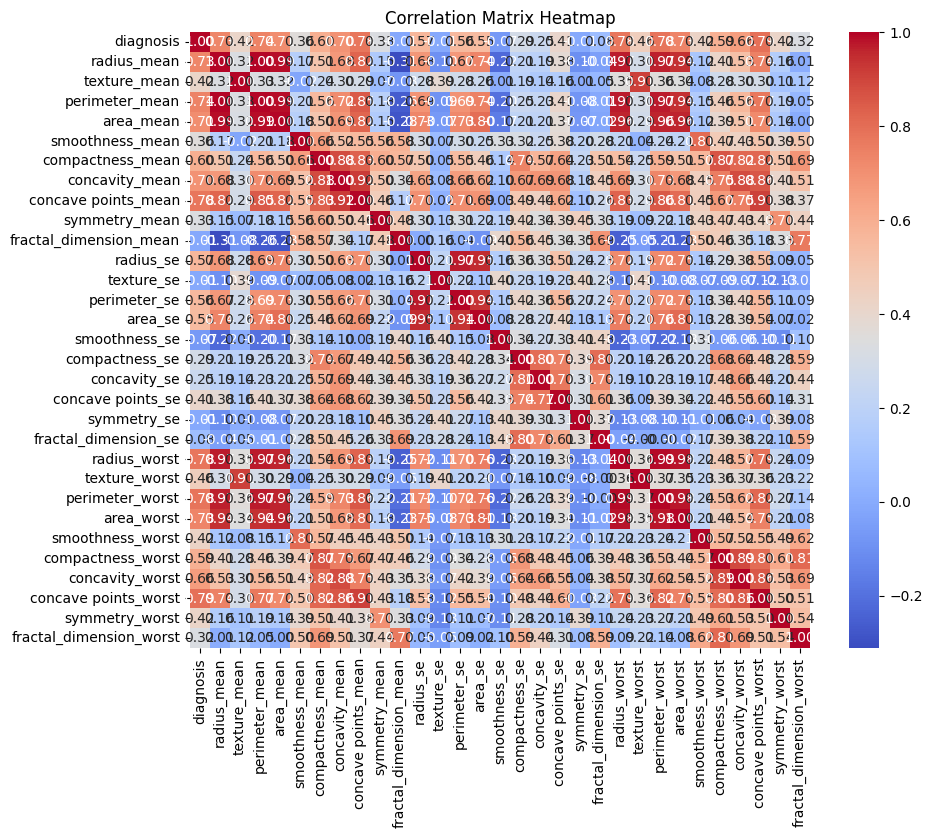

In [101]:
correlation_matrix = train_df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

## Feature Selection

Feature selection involves choosing a subset of relevant features from the original set of variables in a dataset, with the goal of enhancing model performance, reducing computational complexity, and improving interpretability. The importance of feature selection lies in its ability to mitigate the risk of overfitting, where a model performs well on training data but struggles with new, unseen data. By selecting the most informative and influential features, practitioners can streamline the model, making it more efficient and robust.

All features have been included.

# Data Processing

### Data Split

The train dataset is divided in a 90:10 split where 10% of the data is used for validation. 

In [102]:
X = train_df.drop('diagnosis', axis=1)
y = train_df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Model Selection

Now that prerequisite data processing and analysis have been conducted, we can move on to the classification model development. The classifiers that will be concidered are:
- Logistic Regression
- Nearest Neighbors
- Linear Support Vector Machine
- RBF Support Vector Machine
- Decision Tree
- Random Forest
- AdaBoost

In [103]:
names = ['Logistic Regression', 'Nearest Neighbors',
         'Linear SVM', 'RBF SVM',
         'Decision Tree', 'Random Forest', 'AdaBoost']

classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(),
    SVC(kernel="linear"),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier()
]

In [104]:
results = []

models = {}
confusion = {}
class_report = {}


for name, clf in zip(names, classifiers):
    print ('Fitting {:s} model...'.format(name))
    run_time = %timeit -q -o clf.fit(X_train, y_train)

    print ('... predicting')
    y_pred = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    print ('... scoring')
    accuracy  = metrics.accuracy_score(y_train, y_pred)
    precision = metrics.precision_score(y_train, y_pred)
    recall    = metrics.recall_score(y_train, y_pred)

    f1        = metrics.f1_score(y_train, y_pred)
    f1_test   = metrics.f1_score(y_test, y_pred_test)

    # Save the results to dictionaries
    models[name] = clf
    confusion[name] = metrics.confusion_matrix(y_train, y_pred)
    class_report[name] = metrics.classification_report(y_train, y_pred)

    results.append([name, accuracy, precision, recall, f1, f1_test, run_time.best])


results = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Train', 'F1 Test', 'Train Time'])
results.set_index('Classifier', inplace= True)

print ('... All done!')

Fitting Logistic Regression model...
... predicting
... scoring
Fitting Nearest Neighbors model...
... predicting
... scoring
Fitting Linear SVM model...
... predicting
... scoring
Fitting RBF SVM model...
... predicting
... scoring
Fitting Decision Tree model...
... predicting
... scoring
Fitting Random Forest model...
... predicting
... scoring
Fitting AdaBoost model...
... predicting
... scoring
... All done!


In [105]:
results.sort_values('F1 Train', ascending=False)

,Accuracy,Precision,Recall,F1 Train,F1 Test,Train Time
Classifier,,,,,,
Decision Tree,1.000000,1.000000,1.000000,1.000000,0.857143,0.026412
Random Forest,1.000000,1.000000,1.000000,1.000000,0.941176,0.446531
AdaBoost,1.000000,1.000000,1.000000,1.000000,0.941176,0.376481
Logistic Regression,0.988281,0.989637,0.979487,0.984536,0.969697,0.012170
Linear SVM,0.988281,0.989637,0.979487,0.984536,0.941176,0.004984
RBF SVM,0.988281,1.000000,0.969231,0.984375,0.941176,0.007012
Nearest Neighbors,0.980469,1.000000,0.948718,0.973684,0.882353,0.001853


In [106]:
results.sort_values('F1 Test', ascending=False)

,Accuracy,Precision,Recall,F1 Train,F1 Test,Train Time
Classifier,,,,,,
Logistic Regression,0.988281,0.989637,0.979487,0.984536,0.969697,0.012170
Linear SVM,0.988281,0.989637,0.979487,0.984536,0.941176,0.004984
RBF SVM,0.988281,1.000000,0.969231,0.984375,0.941176,0.007012
Random Forest,1.000000,1.000000,1.000000,1.000000,0.941176,0.446531
AdaBoost,1.000000,1.000000,1.000000,1.000000,0.941176,0.376481
Nearest Neighbors,0.980469,1.000000,0.948718,0.973684,0.882353,0.001853
Decision Tree,1.000000,1.000000,1.000000,1.000000,0.857143,0.026412


Preliminary validation indicates that all models train very well, with Decision Tree performing the best in the train F1 metric and Logistic Regression performing the best in the validation F1 metric. The top 5 performing classifiers, according to the validation F1 metric, were selected for hyperparameter tuning.

# Hyperparameter Tuning

Hyperparameter tuning is a crucial aspect of fine-tuning machine learning models to achieve optimal performance. Hyperparameters are configuration settings external to the model itself, influencing its learning process. By selecting the optimal hyperparameters, practitioners can enhance a model's ability to generalize to new data, prevent overfitting, and ultimately improve its predictive accuracy.

In [107]:
def objective(trial):
    classifier_name = trial.suggest_categorical('classifier', ['adaboost', 'random_forest', 'svm', 'knn', 'logreg'])

    if classifier_name == 'adaboost':
        model = AdaBoostClassifier(
            n_estimators=trial.suggest_int('n_estimators', 1, 200),
            learning_rate=trial.suggest_float('learning_rate', 0.01, 1.0),
            random_state=trial.suggest_int('random_state', 42, 42)
        )
    elif classifier_name == 'random_forest':
        model = RandomForestClassifier(
            n_estimators=trial.suggest_int('n_estimators', 50, 200),
            criterion=trial.suggest_categorical('criterion', ['gini', 'entropy', 'log_loss']),
            max_depth=trial.suggest_int('max_depth', 2, 32, log=True),
            min_samples_split=trial.suggest_int('min_samples_split', 2, 100),
            min_samples_leaf=trial.suggest_int('min_samples_leaf', 1, 50),
            max_features=trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
            random_state=trial.suggest_int('random_state', 42, 42)
        )
    elif classifier_name == 'svm':
        model = SVC(
#             C=trial.suggest_float('C', 0.1, 10.0, log=True),
#             kernel=trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid']),
#             degree=trial.suggest_int('degree', 1, 10),
#             gamma=trial.suggest_float('gamma', 0.01, 10),
#             random_state=trial.suggest_int('random_state', 42, 42)
            
        )
    elif classifier_name == 'knn':
        model = KNeighborsClassifier(
#             n_neighbors=trial.suggest_int('n_neighbors', 2, 50),
#             weights=trial.suggest_categorical('weights', ['uniform', 'distance']),
#             random_state=trial.suggest_int('random_state', 42, 42)
        )
    elif classifier_name == 'logreg':
        model = LogisticRegression(
            C=trial.suggest_float('C', 0.1, 10.0, log=True),
            random_state=trial.suggest_int('random_state', 42, 42)
        )

    # Train the model
    model.fit(X_train, y_train)

    # Predict on the validation set
    y_pred = model.predict(X_train)

    # Calculate F1 score
    f1 = f1_score(y_train, y_pred)

    return f1

In [108]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=1000)

best_hyperparameters = {}

# Iterate over trials and update best hyperparameters for each classifier
for trial in study.trials:
    classifier_name = trial.params['classifier']
    if classifier_name not in best_hyperparameters or trial.value > best_hyperparameters[classifier_name]['f1_score']:
        best_hyperparameters[classifier_name] = {
            'f1_score': trial.value,
            'hyperparameters': {key: trial.params[key] for key in trial.params if key != 'classifier'}
        }

[I 2024-02-03 22:41:26,901] A new study created in memory with name: no-name-d60f1065-edd0-4018-95dc-5c7825332963
[I 2024-02-03 22:41:26,998] Trial 0 finished with value: 0.9736842105263158 and parameters: {'classifier': 'knn'}. Best is trial 0 with value: 0.9736842105263158.
[I 2024-02-03 22:41:27,227] Trial 1 finished with value: 0.9481865284974094 and parameters: {'classifier': 'random_forest', 'n_estimators': 55, 'criterion': 'entropy', 'max_depth': 14, 'min_samples_split': 60, 'min_samples_leaf': 19, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 0 with value: 0.9736842105263158.
[I 2024-02-03 22:41:27,271] Trial 2 finished with value: 0.9736842105263158 and parameters: {'classifier': 'knn'}. Best is trial 0 with value: 0.9736842105263158.
[I 2024-02-03 22:41:27,320] Trial 3 finished with value: 0.9736842105263158 and parameters: {'classifier': 'knn'}. Best is trial 0 with value: 0.9736842105263158.
[I 2024-02-03 22:41:27,599] Trial 4 finished with value: 0.99742930591

[I 2024-02-03 22:42:04,419] Trial 38 finished with value: 0.9843749999999999 and parameters: {'classifier': 'svm'}. Best is trial 9 with value: 1.0.
[I 2024-02-03 22:42:07,013] Trial 39 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 200, 'learning_rate': 0.9991496762117777, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 22:42:07,910] Trial 40 finished with value: 0.9454545454545454 and parameters: {'classifier': 'random_forest', 'n_estimators': 183, 'criterion': 'log_loss', 'max_depth': 6, 'min_samples_split': 52, 'min_samples_leaf': 28, 'max_features': 'sqrt', 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 22:42:09,367] Trial 41 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 140, 'learning_rate': 0.4387574052072367, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 22:42:10,441] Trial 42 finished with value: 1.0 and parameters: {'classifier': 'adaboost'

[I 2024-02-03 22:42:40,798] Trial 77 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 187, 'learning_rate': 0.9923986056610796, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 22:42:40,833] Trial 78 finished with value: 0.9843749999999999 and parameters: {'classifier': 'svm'}. Best is trial 9 with value: 1.0.
[I 2024-02-03 22:42:40,893] Trial 79 finished with value: 0.9736842105263158 and parameters: {'classifier': 'knn'}. Best is trial 9 with value: 1.0.
[I 2024-02-03 22:42:42,120] Trial 80 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 152, 'learning_rate': 0.6742210252942311, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 22:42:43,643] Trial 81 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 194, 'learning_rate': 0.9015456726374342, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 22:42:45,076] Trial 82 finished with 

[I 2024-02-03 22:43:21,241] Trial 116 finished with value: 0.9843749999999999 and parameters: {'classifier': 'svm'}. Best is trial 9 with value: 1.0.
[I 2024-02-03 22:43:22,444] Trial 117 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 147, 'learning_rate': 0.7532994132155383, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 22:43:23,183] Trial 118 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 78, 'learning_rate': 0.88717959367612, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 22:43:23,280] Trial 119 finished with value: 0.9736842105263158 and parameters: {'classifier': 'knn'}. Best is trial 9 with value: 1.0.
[I 2024-02-03 22:43:25,033] Trial 120 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 185, 'learning_rate': 0.7117909432353348, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 22:43:26,672] Trial 121 finished wi

[I 2024-02-03 22:44:02,468] Trial 155 finished with value: 0.9399477806788513 and parameters: {'classifier': 'random_forest', 'n_estimators': 131, 'criterion': 'log_loss', 'max_depth': 2, 'min_samples_split': 34, 'min_samples_leaf': 11, 'max_features': None, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 22:44:03,922] Trial 156 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 185, 'learning_rate': 0.446025856973835, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 22:44:04,747] Trial 157 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 102, 'learning_rate': 0.8344436800382665, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 22:44:05,837] Trial 158 finished with value: 0.9974293059125964 and parameters: {'classifier': 'adaboost', 'n_estimators': 138, 'learning_rate': 0.11061669658957618, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 22:4

[I 2024-02-03 22:44:47,120] Trial 193 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 186, 'learning_rate': 0.85678028415296, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 22:44:48,690] Trial 194 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 195, 'learning_rate': 0.9689733082238065, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 22:44:50,107] Trial 195 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 180, 'learning_rate': 0.9991237442663736, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 22:44:51,662] Trial 196 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 198, 'learning_rate': 0.9435794541160009, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 22:44:52,325] Trial 197 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 80, 'lea

[I 2024-02-03 22:45:31,163] Trial 231 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 116, 'learning_rate': 0.6261860244890599, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 22:45:32,959] Trial 232 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 189, 'learning_rate': 0.5980182713319658, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 22:45:33,900] Trial 233 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 105, 'learning_rate': 0.42484284893066043, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 22:45:34,827] Trial 234 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 115, 'learning_rate': 0.6551603217821803, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 22:45:35,705] Trial 235 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 109, 

[I 2024-02-03 22:46:17,258] Trial 270 finished with value: 0.9974293059125964 and parameters: {'classifier': 'adaboost', 'n_estimators': 82, 'learning_rate': 0.20197790998109177, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 22:46:18,465] Trial 271 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 144, 'learning_rate': 0.7208075333509989, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 22:46:19,740] Trial 272 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 111, 'learning_rate': 0.7856634938882041, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 22:46:21,691] Trial 273 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 196, 'learning_rate': 0.9035973669875718, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 22:46:22,746] Trial 274 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_esti

[I 2024-02-03 22:47:03,485] Trial 308 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 184, 'learning_rate': 0.6905429107824532, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 22:47:05,029] Trial 309 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 146, 'learning_rate': 0.9855328818572461, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 22:47:06,987] Trial 310 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 200, 'learning_rate': 0.9340502603929115, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 22:47:08,119] Trial 311 finished with value: 0.9896373056994818 and parameters: {'classifier': 'adaboost', 'n_estimators': 77, 'learning_rate': 0.12438640399424486, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 22:47:10,491] Trial 312 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_esti

[I 2024-02-03 22:48:05,264] Trial 346 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 144, 'learning_rate': 0.5351107517599129, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 22:48:05,330] Trial 347 finished with value: 0.9843749999999999 and parameters: {'classifier': 'svm'}. Best is trial 9 with value: 1.0.
[I 2024-02-03 22:48:07,137] Trial 348 finished with value: 0.9896373056994818 and parameters: {'classifier': 'adaboost', 'n_estimators': 122, 'learning_rate': 0.07857487905738542, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 22:48:09,498] Trial 349 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 200, 'learning_rate': 0.9994731357040938, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 22:48:11,021] Trial 350 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 150, 'learning_rate': 0.9448012021334737, 'random_state': 

[I 2024-02-03 22:48:56,959] Trial 385 finished with value: 0.9501312335958005 and parameters: {'classifier': 'adaboost', 'n_estimators': 182, 'learning_rate': 0.011013860246991608, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 22:48:57,868] Trial 386 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 96, 'learning_rate': 0.8009686148691854, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 22:48:59,337] Trial 387 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 131, 'learning_rate': 0.996195234830354, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 22:49:01,496] Trial 388 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 173, 'learning_rate': 0.6765173174143514, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 22:49:03,525] Trial 389 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_esti

[I 2024-02-03 22:49:51,335] Trial 423 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 191, 'learning_rate': 0.8125867958316612, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 22:49:51,368] Trial 424 finished with value: 0.9843749999999999 and parameters: {'classifier': 'svm'}. Best is trial 9 with value: 1.0.
[I 2024-02-03 22:49:52,755] Trial 425 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 173, 'learning_rate': 0.6625376000393055, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 22:49:53,701] Trial 426 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 117, 'learning_rate': 0.7524168892669951, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 22:49:55,255] Trial 427 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 196, 'learning_rate': 0.4851349503886993, 'random_state': 42}. Best is tri

[I 2024-02-03 22:50:35,587] Trial 462 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 192, 'learning_rate': 0.9789694918724665, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 22:50:36,754] Trial 463 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 116, 'learning_rate': 0.697920326482937, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 22:50:38,522] Trial 464 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 186, 'learning_rate': 0.8438661440267727, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 22:50:39,623] Trial 465 finished with value: 0.9460154241645243 and parameters: {'classifier': 'random_forest', 'n_estimators': 80, 'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 16, 'max_features': None, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 22:50:41,275] Trial 466 fi

[I 2024-02-03 22:51:30,165] Trial 500 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 194, 'learning_rate': 0.999949088404192, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 22:51:31,721] Trial 501 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 159, 'learning_rate': 0.5345939170439437, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 22:51:33,192] Trial 502 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 175, 'learning_rate': 0.6347381304912185, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 22:51:34,386] Trial 503 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 132, 'learning_rate': 0.2373543253053798, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 22:51:36,075] Trial 504 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 186, 'l

[I 2024-02-03 22:52:19,562] Trial 539 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 166, 'learning_rate': 0.27639645371736243, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 22:52:20,460] Trial 540 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 88, 'learning_rate': 0.4715711430964966, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 22:52:21,855] Trial 541 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 151, 'learning_rate': 0.44323546566638894, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 22:52:23,565] Trial 542 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 193, 'learning_rate': 0.9523417537468474, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 22:52:25,157] Trial 543 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 186, 

[I 2024-02-03 22:53:05,250] Trial 577 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 56, 'learning_rate': 0.745338300479691, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 22:53:06,915] Trial 578 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 196, 'learning_rate': 0.3846756937124195, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 22:53:08,088] Trial 579 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 137, 'learning_rate': 0.9151972091063892, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 22:53:09,311] Trial 580 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 144, 'learning_rate': 0.1407738939384986, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 22:53:10,642] Trial 581 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 153, 'le

[I 2024-02-03 22:53:52,555] Trial 616 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 150, 'learning_rate': 0.7511606683349233, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 22:53:54,328] Trial 617 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 183, 'learning_rate': 0.985599152515941, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 22:53:55,581] Trial 618 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 137, 'learning_rate': 0.9632954743664501, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 22:53:56,986] Trial 619 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 154, 'learning_rate': 0.8773646447064977, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 22:53:58,132] Trial 620 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 109, 'l

[I 2024-02-03 22:54:44,589] Trial 654 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 196, 'learning_rate': 0.41624462127697426, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 22:54:45,145] Trial 655 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 50, 'learning_rate': 0.9809579651730022, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 22:54:46,505] Trial 656 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 112, 'learning_rate': 0.6088703780723376, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 22:54:47,504] Trial 657 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 101, 'learning_rate': 0.9520472113585523, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 22:54:49,038] Trial 658 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 140, '

[I 2024-02-03 22:55:38,003] Trial 693 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 89, 'learning_rate': 0.3842528911605029, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 22:55:38,668] Trial 694 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 72, 'learning_rate': 0.8910053691775164, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 22:55:40,105] Trial 695 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 139, 'learning_rate': 0.34688015842925, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 22:55:41,288] Trial 696 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 99, 'learning_rate': 0.9995092532037405, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 22:55:41,988] Trial 697 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 65, 'learni

[I 2024-02-03 22:56:27,918] Trial 731 finished with value: 0.9870801033591731 and parameters: {'classifier': 'logreg', 'C': 3.744249582111871, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 22:56:30,649] Trial 732 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 139, 'learning_rate': 0.5611194959107443, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 22:56:33,172] Trial 733 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 156, 'learning_rate': 0.7695229525974934, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 22:56:35,351] Trial 734 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 187, 'learning_rate': 0.9153406691559254, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 22:56:35,953] Trial 735 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 59, 'learning_rate': 0.9508

[I 2024-02-03 22:57:24,008] Trial 770 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 187, 'learning_rate': 0.3845978905325366, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 22:57:25,338] Trial 771 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 143, 'learning_rate': 0.9466010478298105, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 22:57:26,584] Trial 772 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 133, 'learning_rate': 0.757185681290985, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 22:57:27,829] Trial 773 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 138, 'learning_rate': 0.3339095726767075, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 22:57:28,628] Trial 774 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 83, 'le

[I 2024-02-03 22:58:29,985] Trial 808 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 137, 'learning_rate': 0.966283923072533, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 22:58:30,064] Trial 809 finished with value: 0.9845360824742267 and parameters: {'classifier': 'logreg', 'C': 0.7614898173303339, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 22:58:30,923] Trial 810 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 74, 'learning_rate': 0.825366314555985, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 22:58:32,177] Trial 811 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 123, 'learning_rate': 0.9214605482338157, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 22:58:34,157] Trial 812 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 192, 'learning_rate': 0.80441

[I 2024-02-03 22:59:42,831] Trial 847 finished with value: 0.9736842105263158 and parameters: {'classifier': 'knn'}. Best is trial 9 with value: 1.0.
[I 2024-02-03 22:59:44,550] Trial 848 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 147, 'learning_rate': 0.4618218572916, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 22:59:45,162] Trial 849 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 40, 'learning_rate': 0.5900057592456878, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 22:59:47,636] Trial 850 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 194, 'learning_rate': 0.8356332351756601, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 22:59:49,051] Trial 851 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 141, 'learning_rate': 0.5349229264325833, 'random_state': 42}. Best is trial 9

[I 2024-02-03 23:00:37,383] Trial 885 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 193, 'learning_rate': 0.9986249367207618, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 23:00:38,687] Trial 886 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 136, 'learning_rate': 0.5486038443998945, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 23:00:38,752] Trial 887 finished with value: 0.9896907216494846 and parameters: {'classifier': 'logreg', 'C': 7.4309062408521545, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 23:00:40,203] Trial 888 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 157, 'learning_rate': 0.7409015476061002, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 23:00:41,408] Trial 889 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 130, 'learning_rate': 0.36

[I 2024-02-03 23:01:25,256] Trial 924 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 193, 'learning_rate': 0.9343323836907378, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 23:01:25,339] Trial 925 finished with value: 0.9736842105263158 and parameters: {'classifier': 'knn'}. Best is trial 9 with value: 1.0.
[I 2024-02-03 23:01:26,722] Trial 926 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 149, 'learning_rate': 0.7837987671828769, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 23:01:28,020] Trial 927 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 142, 'learning_rate': 0.28282207879386884, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 23:01:29,562] Trial 928 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 167, 'learning_rate': 0.9812555411379104, 'random_state': 42}. Best is tr

[I 2024-02-03 23:02:15,055] Trial 962 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 170, 'learning_rate': 0.3929421018470814, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 23:02:15,965] Trial 963 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 98, 'learning_rate': 0.999972935484431, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 23:02:16,797] Trial 964 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 86, 'learning_rate': 0.9563400907787686, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 23:02:17,180] Trial 965 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 34, 'learning_rate': 0.7592832548831339, 'random_state': 42}. Best is trial 9 with value: 1.0.
[I 2024-02-03 23:02:18,558] Trial 966 finished with value: 1.0 and parameters: {'classifier': 'adaboost', 'n_estimators': 146, 'lear

1000 trials have been run to determine optimal hyperparameter values for the assessed classifiers. The 'optimal' hyperparameters are stated below.

In [109]:
# Print the best hyperparameters for each classifier
print('Best Hyperparameters for Each Classifier:')
for classifier_name, info in best_hyperparameters.items():
    print(f"\nClassifier: {classifier_name}")
    print(f"F1 Score: {info['f1_score']}")
    print("Hyperparameters:")
    for key, value in info['hyperparameters'].items():
        print(f"  {key}: {value}")

Best Hyperparameters for Each Classifier:

Classifier: knn
F1 Score: 0.9736842105263158
Hyperparameters:

Classifier: random_forest
F1 Score: 1.0
Hyperparameters:
  n_estimators: 197
  criterion: gini
  max_depth: 17
  min_samples_split: 3
  min_samples_leaf: 1
  max_features: log2
  random_state: 42

Classifier: adaboost
F1 Score: 1.0
Hyperparameters:
  n_estimators: 142
  learning_rate: 0.6749788972837046
  random_state: 42

Classifier: logreg
F1 Score: 0.9896907216494846
Hyperparameters:
  C: 7.828101826814859
  random_state: 42

Classifier: svm
F1 Score: 0.9843749999999999
Hyperparameters:


In [110]:
classifier_mapping = {'knn': KNeighborsClassifier,
                      'random_forest': RandomForestClassifier,
                      'logreg': LogisticRegression,
                      'adaboost': AdaBoostClassifier,
                      'svm': SVC}

hyperparameters_list = list(best_hyperparameters.items())

names = [
    classifier_type
    for classifier_type, metrics in hyperparameters_list
]

classifiers = [
    classifier_mapping[classifier_type](**metrics['hyperparameters'])
    for classifier_type, metrics in hyperparameters_list
]

results = []

models = {}
confusion = {}
class_report = {}


for name, clf in zip(names, classifiers):
    print ('Fitting {:s} model...'.format(name))
    run_time = %timeit -q -o clf.fit(X_train, y_train)

    print ('... predicting')
    y_pred = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    print ('... scoring')
    accuracy  = metrics.accuracy_score(y_train, y_pred)
    precision = metrics.precision_score(y_train, y_pred)
    recall    = metrics.recall_score(y_train, y_pred)

    f1        = metrics.f1_score(y_train, y_pred)
    f1_test   = metrics.f1_score(y_test, y_pred_test)

    # Save the results to dictionaries
    models[name] = clf
    confusion[name] = metrics.confusion_matrix(y_train, y_pred)
    class_report[name] = metrics.classification_report(y_train, y_pred)

    results.append([name, accuracy, precision, recall, f1, f1_test, run_time.best])


results = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Train', 'F1 Test', 'Train Time'])
results.set_index('Classifier', inplace= True)

print ('... All done!')

Fitting knn model...
... predicting
... scoring
Fitting random_forest model...
... predicting
... scoring
Fitting adaboost model...
... predicting
... scoring
Fitting logreg model...
... predicting
... scoring
Fitting svm model...
... predicting
... scoring
... All done!


In [111]:
results.sort_values('F1 Test', ascending=False)

,Accuracy,Precision,Recall,F1 Train,F1 Test,Train Time
Classifier,,,,,,
adaboost,1.000000,1.000000,1.000000,1.000000,0.969697,1.077924
random_forest,1.000000,1.000000,1.000000,1.000000,0.941176,0.823010
logreg,0.992188,0.994819,0.984615,0.989691,0.941176,0.021400
svm,0.988281,1.000000,0.969231,0.984375,0.941176,0.007299
knn,0.980469,1.000000,0.948718,0.973684,0.882353,0.001719


## Conclusion

In [112]:
classifier = None

for key, value in models.items():
    if 'adaboost' in key:
        classifier = value

In [113]:
with open('model.pkl', 'wb') as file:
    pickle.dump(classifier, file)